<a href="https://colab.research.google.com/github/samandarali/Complete-Python-3-Bootcamp/blob/master/scikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
type(housing)

sklearn.utils._bunch.Bunch

In [ ]:
print(housing.data.shape)

(20640, 8)


In [ ]:
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
df=pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseValue"]=housing.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
corr_matrix=df.corr()
print(corr_matrix)

                 MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc         1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge      -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms       0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms     -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population     0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup       0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude      -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude     -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseValue  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

               Latitude  Longitude  MedHouseValue  
MedInc        -0.079809  -0.015176       0.688075  
HouseAge       0.011173  -0.108197       0.105623  
AveRooms       0.106389  -0.027540       0.

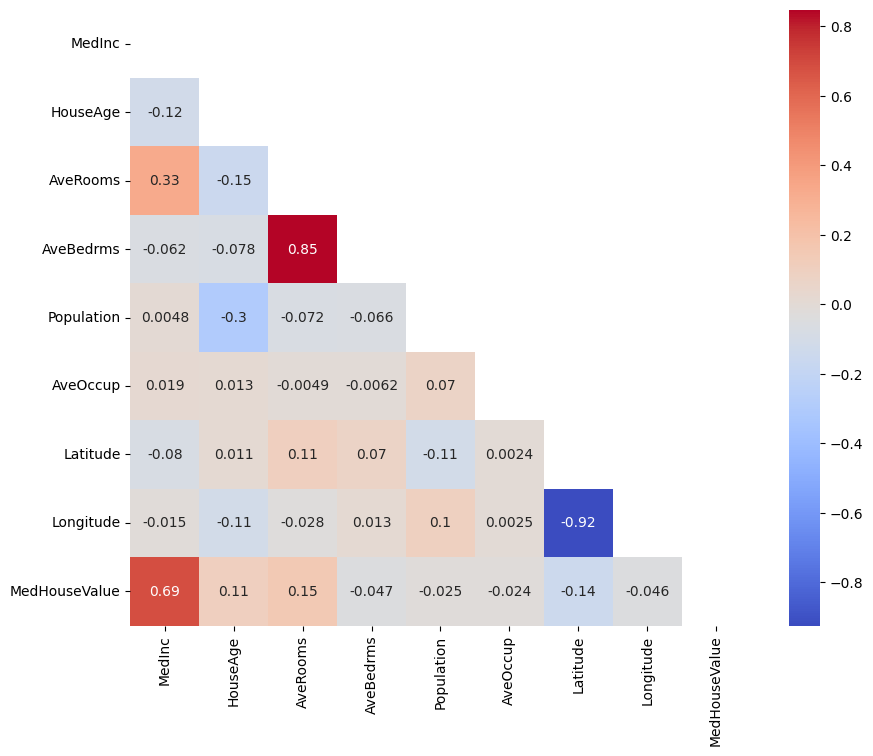

In [ ]:
plt.figure(figsize=(10,8))
mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm')
plt.show()


In [ ]:
# missing values
sum_missing=pd.isnull(df).sum()
print(sum_missing)

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64


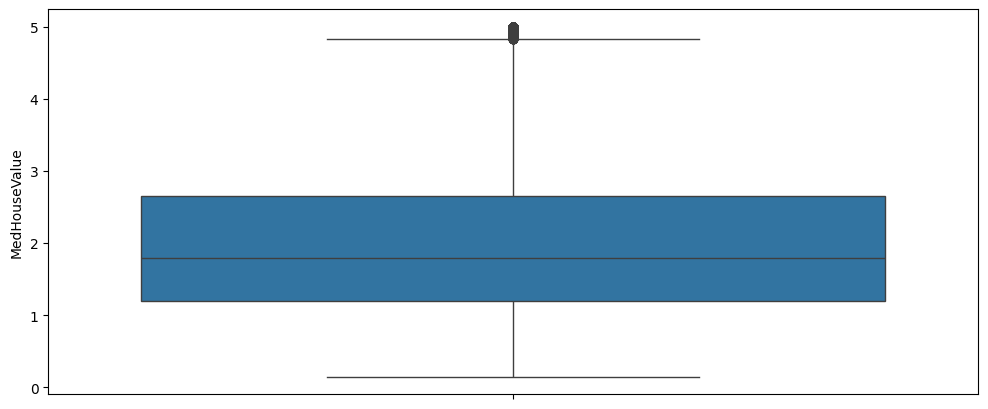

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(df['MedHouseValue'])
plt.show()

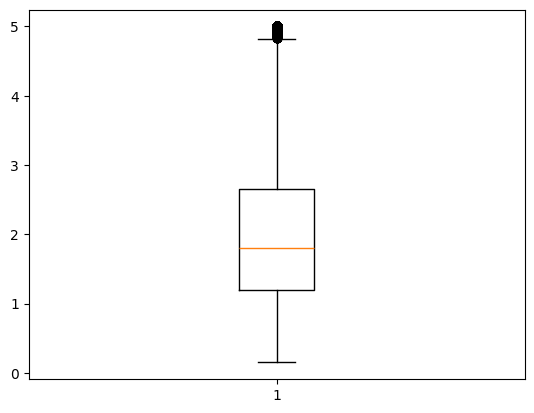

In [ ]:
plt.boxplot(df['MedHouseValue'])
plt.show()

### Anomaly detection

In [ ]:
from sklearn.ensemble import IsolationForest


# *ML:*

---



In [ ]:
X=df.drop("MedHouseValue", axis=1)
y=df['MedHouseValue']

In [ ]:
# First split: train +temp (validation+test)
X_train, X_temp, y_train, y_temp=train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Second split: validation +test (split temp into 50/50)
X_val, X_test, y_val, y_test=train_test_split( X_temp,y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model

In [ ]:
LassoReg=linear_model.Lasso(alpha=0.1, max_iter=10000)

rf=RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)

gb=GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [ ]:
# model=KNeighborsRegressor
# List of models to evaluate
models={
    "Linear Regression": LinearRegression(),
    "KNeighbors Regression": KNeighborsRegressor(n_neighbors=5, weights='distance'),
    "Random Forest":rf,
    "Gradient Boosting":gb,
    "Lasso Regression": LassoReg
        }


In [ ]:
# loop over models
# DataFrame to store results
# results=pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2"])
all_results = []

# print(results.columns)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_val)

    all_results.append({
      "Model": name,
      "MAE": mean_absolute_error(y_val, y_pred),
      "MSE": mean_squared_error(y_val, y_pred),
      "RMSE": np.sqrt(mean_squared_error(y_val, y_pred)),
      "R2": r2_score(y_val, y_pred)
  })


results = pd.DataFrame(all_results)
print(results)

                   Model       MAE       MSE      RMSE        R2
0      Linear Regression  0.533452  0.540875  0.735442  0.584826
1  KNeighbors Regression  0.804784  1.103105  1.050288  0.153261
2          Random Forest  0.337418  0.266134  0.515882  0.795716
3      Gradient Boosting  0.355403  0.272317  0.521840  0.790971
4       Lasso Regression  0.585986  0.622349  0.788891  0.522287


In [ ]:
# Assuming your Random Forest model is called rf
rf.fit(X_train, y_train)  # fit on training data

# Predict on the test set
y_test_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Test MAE:", mae_test)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test R²:", r2_test)


Test MAE: 0.32341011028746797
Test MSE: 0.24098102841369304
Test RMSE: 0.4908981853843962
Test R²: 0.8177575971977658


/tmp/ipython-input-793581877.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette="viridis")


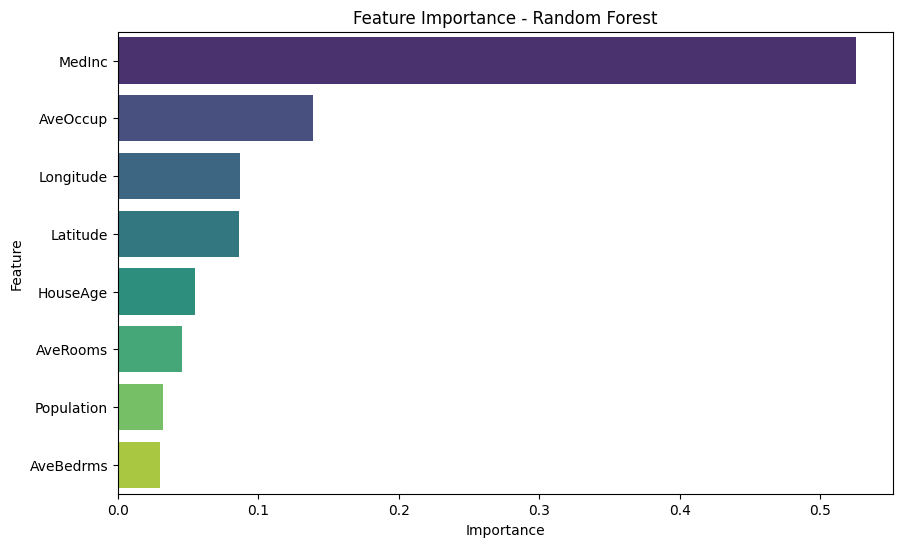

In [ ]:


# Use your best model, e.g., Random Forest
best_model = RandomForestRegressor(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)

# Get feature importances
importances = best_model.feature_importances_
features = X_train.columns

# Create a DataFrame
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()


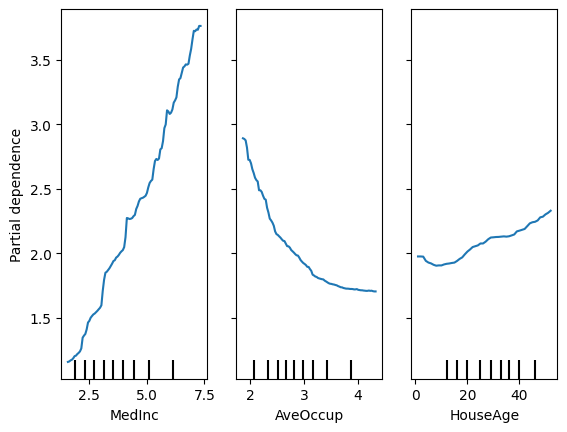

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(best_model, X_train, [0, 5, 1])
plt.show()


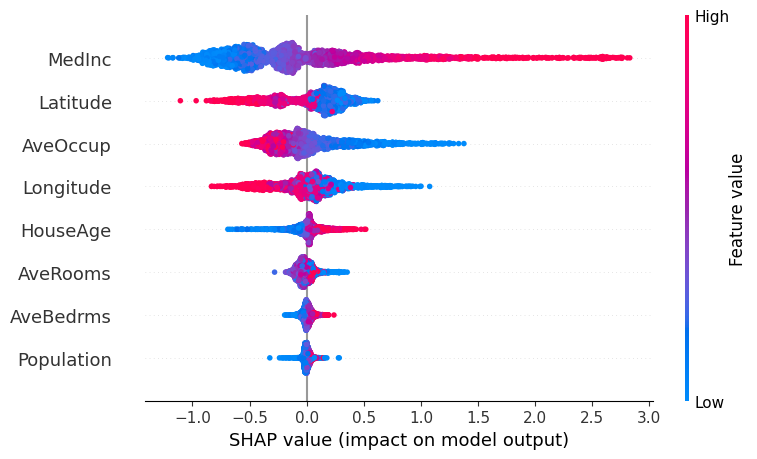

In [ ]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_val)

# Summary plot (feature importance + direction of effect)
shap.summary_plot(shap_values, X_val)

# Force plot for one observation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_val.iloc[0,:])


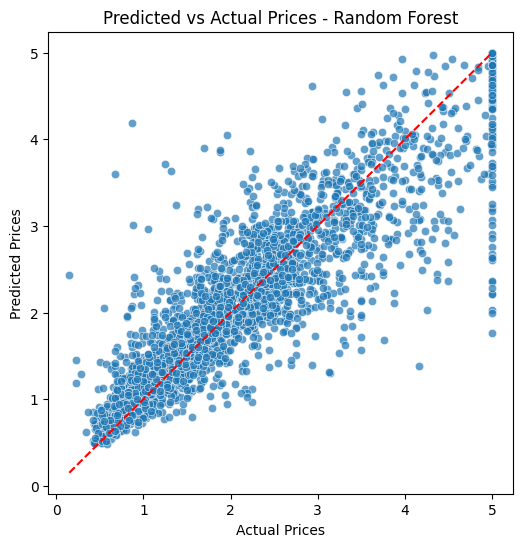

In [ ]:
y_pred = best_model.predict(X_val)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # 45° line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices - Random Forest")
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Example if you used a scaler on y
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1))
y_val_scaled = scaler.transform(y_val.reshape(-1,1))

# After prediction
y_pred = best_model.predict(X_val)

# Inverse transform to get original prices
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1,1))
y_val_original = scaler.inverse_transform(y_val_scaled)


AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
sns.scatterplot(x=y_val_original.flatten(), y=y_pred_original.flatten(), alpha=0.7)
plt.plot([y_val_original.min(), y_val_original.max()],
         [y_val_original.min(), y_val_original.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices - Random Forest")
plt.show()
